In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Linear Regression from Scratch

Built using NumPy, visualized with Matplotlib.  
Dataset: [Random Linear Regression Dataset](https://www.kaggle.com/datasets/andonians/random-linear-regression)

Includes:
- Feature normalization
- Gradient descent implementation
- Manual prediction function


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


df = pd.read_csv('/kaggle/input/random-linear-regression/train.csv')  


df.head()


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
x = df["x"]
y = df["y"]

print("Any NaN in x?", x.isna().any())
print("Any NaN in y?", y.isna().any())
print("Any Inf in x?", np.isinf(x).any())
print("Any Inf in y?", np.isinf(y).any())



Any NaN in x? False
Any NaN in y? True
Any Inf in x? False
Any Inf in y? False


In [ ]:
df = df.dropna(subset=['y']).reset_index(drop=True)

x_real = df["x"]
y_real = df["y"]




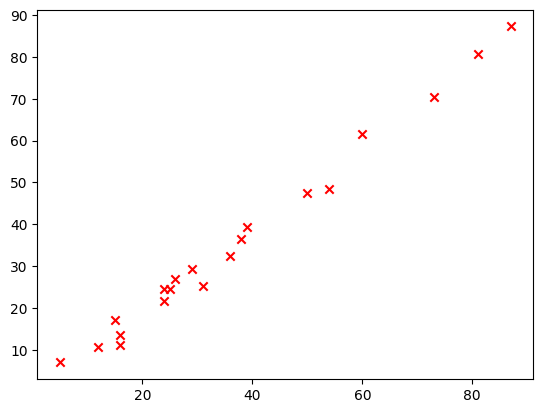

In [ ]:
plt.scatter(x_real.values[:20], y_real.values[:20], marker = 'x', color = 'r')
plt.show()

In [ ]:
x = (x_real - x_real.min()) / (x_real.max() - x_real.min())
y = (y_real - y_real.min()) / (y_real.max() - y_real.min())


In [ ]:
x

0      0.24
1      0.50
2      0.15
3      0.38
4      0.87
       ... 
694    0.58
695    0.93
696    0.82
697    0.66
698    0.97
Name: x, Length: 699, dtype: float64

In [ ]:
y

0      0.225260
1      0.455183
2      0.186836
3      0.358671
4      0.808515
         ...   
694    0.553936
695    0.873602
696    0.820180
697    0.598773
698    0.876709
Name: y, Length: 699, dtype: float64

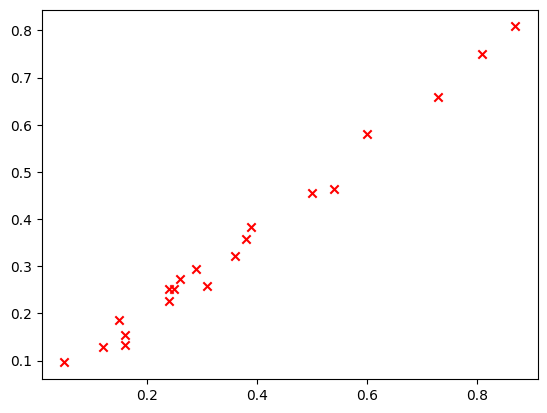

In [ ]:
plt.scatter(x.values[:20], y.values[:20], marker = 'x', color = 'r')
plt.show()

In [ ]:
def compute_cost(x, y, w, b):
    m=x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w*x[i]+b
        cost = cost + (f_wb - y[i])**2

    total_cost = (1/(2*m)) * cost

    return total_cost


In [ ]:
def compute_gradient(x, y, w, b):

    m = x.shape[0]
    dj_dw = 0 
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [ ]:
initial_w = 0
initial_b = 0


tmp_dj_dw, tmp_dj_db = compute_gradient(x, y, initial_w, initial_b)
print("Gradient at initial w, b(Zeros):", tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b(Zeros): -0.31296500041013703 -0.4771456581860453


In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = w_in
    b = b_in
    j_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 100 == 0:
            cost = compute_cost(x, y, w, b)
            j_history.append(cost)
            print(f"Iteration {i}: Cost {cost}, w {w}, b {b}")


    return w, b, j_history

In [ ]:
initial_w = 0
initial_b = 0
learning_rate = 0.1
iterations = 2000

w_learned, b_learned, j_hist = gradient_descent(x, y, initial_w, initial_b, learning_rate, iterations)

print("Learned parameters:", w_learned, b_learned)

Iteration 0: Cost 0.11662332340825401, w 0.031296500041013704, b 0.04771456581860453
Iteration 100: Cost 0.005404490425131926, w 0.54150054370178, b 0.2185626249592784
Iteration 200: Cost 0.001663864783999013, w 0.709263909106433, b 0.1287253824614687
Iteration 300: Cost 0.0006696067021207517, w 0.7957555132340459, b 0.08240885245867073
Iteration 400: Cost 0.00040533296070355816, w 0.8403469425787822, b 0.05852999975408828
Iteration 500: Cost 0.0003350890153179666, w 0.8633364060194177, b 0.04621906872264951
Iteration 600: Cost 0.00031641817864356257, w 0.8751888053942479, b 0.03987207103662755
Iteration 700: Cost 0.00031145547132112094, w 0.881299403464674, b 0.03659982627110218
Iteration 800: Cost 0.00031013638399805636, w 0.8844497705420428, b 0.03491279464840455
Iteration 900: Cost 0.0003097857706628705, w 0.8860739671604069, b 0.03404303217648737
Iteration 1000: Cost 0.0003096925776583897, w 0.8869113345497682, b 0.03359461926745963
Iteration 1100: Cost 0.0003096678069631173, w 0.

In [ ]:
predicted = w_learned * x.values + b_learned

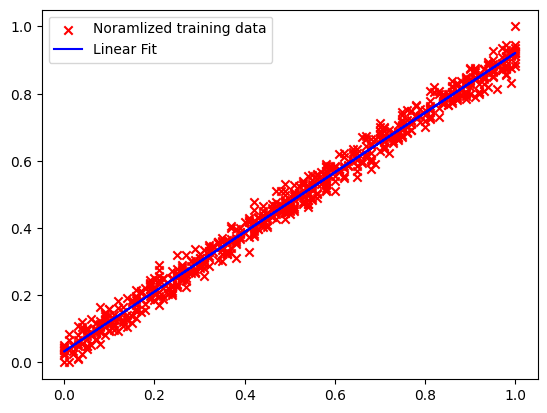

In [ ]:
plt.scatter(x, y, marker='x', color='red', label='Noramlized training data')
plt.plot(x, predicted, color='blue', label='Linear Fit')
plt.legend()
plt.show()

In [ ]:
def predict_value(num):
    x_min = x_real.min()
    x_max = x_real.max()
    x_normalized = (num - x_min) / (x_max - x_min)

    y_normalized = w_learned * x_normalized + b_learned

    y_min = y_real.min()
    y_max = y_real.max()

    value = y_normalized * (y_max - y_min) + y_min

    return value

In [ ]:
Number = int(input("Enter the number you want value for: "))

value = predict_value(Number)
print(f"Predicted value for a number {Number} is : {value}")

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.